In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [28]:
student_dataset = pd.read_csv('student_marks.csv')
student_dataset.head()


,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [29]:
student_dataset.info()
student_dataset.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173476 entries, 0 to 173475
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                173476 non-null  int64  
 1   age               173476 non-null  int64  
 2   gender            173476 non-null  object 
 3   course            173476 non-null  object 
 4   study_hours       173476 non-null  float64
 5   class_attendance  173476 non-null  float64
 6   internet_access   173476 non-null  object 
 7   sleep_hours       173476 non-null  float64
 8   sleep_quality     173476 non-null  object 
 9   study_method      173476 non-null  object 
 10  facility_rating   173475 non-null  object 
 11  exam_difficulty   173475 non-null  object 
 12  exam_score        173475 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 17.2+ MB


,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,173476.000000,173476.000000,173476.000000,173476.000000,173476.000000,173475.000000
mean,86737.500000,20.547188,3.999080,71.985839,7.067308,62.503552
std,50078.351986,2.258882,2.363608,17.442886,1.744447,18.933339
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,43368.750000,19.000000,1.960000,57.000000,5.500000,48.800000
50%,86737.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,130106.250000,23.000000,6.050000,87.300000,8.600000,76.300000
max,173475.000000,24.000000,7.910000,99.400000,9.900000,100.000000


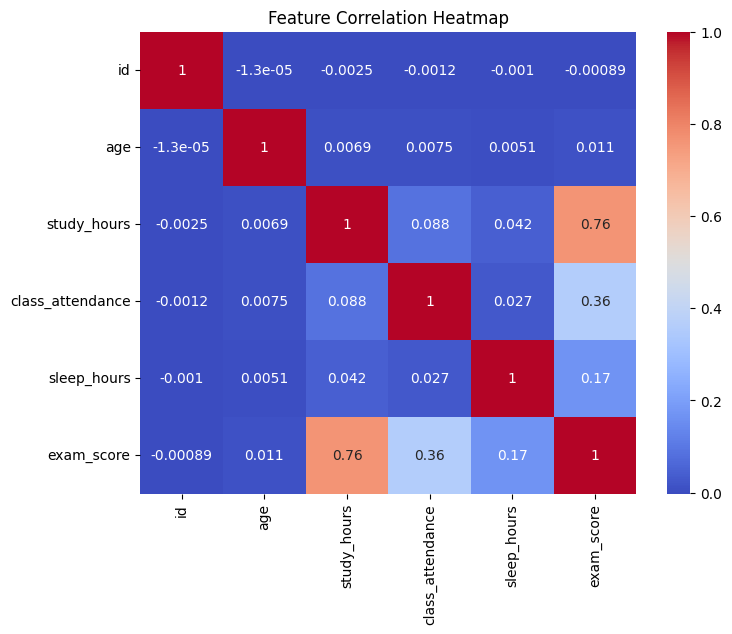

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(student_dataset.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [31]:
X = student_dataset.drop('exam_score', axis=1)
Y = student_dataset['exam_score']

print(X)
print(Y)

            id  age  gender   course  study_hours  class_attendance  \
0            0   21  female     b.sc         7.91              98.8   
1            1   18   other  diploma         4.95              94.8   
2            2   20  female     b.sc         4.68              92.6   
3            3   19    male     b.sc         2.00              49.5   
4            4   23    male      bca         7.65              86.9   
...        ...  ...     ...      ...          ...               ...   
173471  173471   20  female      bba         6.46              69.2   
173472  173472   17    male  diploma         4.89              65.6   
173473  173473   23    male    b.com         6.25              99.2   
173474  173474   24  female     b.sc         3.76              96.2   
173475  173475   18    male     b.sc         3.01              74.6   

       internet_access  sleep_hours sleep_quality   study_method  \
0                   no          4.9       average  online videos   
1          

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.1, random_state=2
)

print(X.shape, X_train.shape, Y_test.shape)


(173476, 12) (156128, 12) (17348,)


In [ ]:
# Handle NaN values in Y_train and corresponding X_train
valid_train_indices = Y_train.dropna().index
X_train_filtered = X_train.loc[valid_train_indices]
Y_train_filtered = Y_train.loc[valid_train_indices]

# Handle NaN values in Y_test and corresponding X_test
valid_test_indices = Y_test.dropna().index
X_test_filtered = X_test.loc[valid_test_indices]
Y_test_filtered = Y_test.loc[valid_test_indices]

# Identify categorical columns for one-hot encoding
categorical_cols = X_train_filtered.select_dtypes(include='object').columns

# Apply one-hot encoding to both training and test sets
X_train_encoded = pd.get_dummies(X_train_filtered, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_filtered, columns=categorical_cols, drop_first=True)

# Align columns - crucial step to ensure both X_train_encoded and X_test_encoded have the same features
# Get all columns that exist in the training set
train_columns = X_train_encoded.columns

# Add missing columns to X_test_encoded and fill with 0
missing_in_test = set(train_columns) - set(X_test_encoded.columns)
for col in missing_in_test:
    X_test_encoded[col] = 0

# Add missing columns to X_train_encoded and fill with 0 (if any categories appear only in test)
missing_in_train = set(X_test_encoded.columns) - set(train_columns)
for col in missing_in_train:
    X_train_encoded[col] = 0

# Reorder columns in X_test_encoded to match X_train_encoded
X_test_encoded = X_test_encoded[train_columns]

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train_encoded, Y_train_filtered)

In [ ]:
train_prediction = model.predict(X_train_encoded)
train_r2 = metrics.r2_score(Y_train_filtered, train_prediction)
print("Training R² Score:", train_r2)

In [ ]:
test_prediction = model.predict(X_test_encoded)
test_r2 = metrics.r2_score(Y_test_filtered, test_prediction)
print("Testing R² Score:", test_r2)

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(Y_train_filtered, train_prediction)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks (Training)")
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, test_prediction)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks (Testing)")
plt.show()


In [ ]:
residuals = Y_test - test_prediction

plt.figure(figsize=(6,6))
sns.histplot(residuals, kde=True)
plt.xlabel("Prediction Error")
plt.title("Residual Distribution")
plt.show()


In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(student_dataset['study_hours'], student_dataset['exam_score'])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Study Hours vs Exam Score")
plt.show()

In [ ]:
# The original input_data was a simple list, which doesn't match the model's feature expectations.
# To make a prediction, new data must be formatted like the X_train_encoded dataframe.

# Create a sample input for a single student, including all original features:
# Make sure to provide values for ALL original columns of the dataset, both numerical and categorical.
# The example values are placeholders; replace them with actual data for a new student.
new_student_data = {
    'id': 173476, # A unique identifier, not used in prediction but kept for consistency
    'age': 20,
    'gender': 'male',
    'course': 'b.sc',
    'study_hours': 5.5,
    'class_attendance': 90.0,
    'internet_access': 'yes',
    'sleep_hours': 7.0,
    'sleep_quality': 'good',
    'study_method': 'online videos',
    'facility_rating': 'high',
    'exam_difficulty': 'easy'
}

# Convert the new data into a pandas DataFrame
new_student_df = pd.DataFrame([new_student_data])


new_student_encoded = pd.get_dummies(new_student_df, columns=categorical_cols, drop_first=True)


# Add any missing columns
missing_in_new_data = set(train_columns) - set(new_student_encoded.columns)
for col in missing_in_new_data:
    new_student_encoded[col] = 0

# Reorder columns to match the training data's column order
new_student_encoded = new_student_encoded[train_columns]

# Make the prediction using the properly formatted data
prediction = model.predict(new_student_encoded)
print("Predicted Student Marks:", prediction)
